**2022-04-20 `17.2-Supervise-ML - Confusion Matrices, Decision Trees, and Ensemble Learning`**

**Objectives**
* Quantify and evaluate classification models by using confusion matrices.
* Interpret confusion matrices and accuracy measures.
* Use decision trees and random forests to aid the feature-selection process.
* Apply bagging and boosting methods to create and use ensemble algorithms.

**Presentation**
* [17.2-Supervise-ML - Confusion Matrices, Decision Trees, and Ensemble Learning](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/ucb-virt-data-pt-10-2021-u-b/-/blob/master/03-Lesson-Plans/17-Supervise-ML/Slideshows/Data-M_17.2-Supervise-ML.pdf)

**Install**
* `Run as Administrator`
```
conda update -n base conda -y
conda install python-graphviz -y
conda install -c conda-forge pydotplus -y
```

![](../Images/confusion_matrixes_khaled.png)

# ==========================================

### 2.01 Instructor Do: Confusion Matrices (0:15)

# Confusion Matrix

A confusion matrix shows the predicted values vs. the actual values by counting the true positives, true negatives, false positives, and false negatives.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Generate some data
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, cluster_std=3, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 1 1 1 1 1 0 1 0]
Data: [[-2.12128686e-03  5.62516556e+00]
 [ 9.67298128e+00  3.12404959e-01]
 [ 1.35105358e+00 -2.34698296e+00]
 [ 6.20838530e+00  2.52069672e-01]
 [ 4.09843910e+00  1.15524924e+01]
 [ 7.56547173e+00  3.47645219e+00]
 [ 6.39996024e+00  5.48458714e-01]
 [-1.91963411e+00  1.11412974e+01]
 [ 1.72490863e+00 -2.16568481e+00]
 [-2.60857854e+00  1.43979597e+01]]


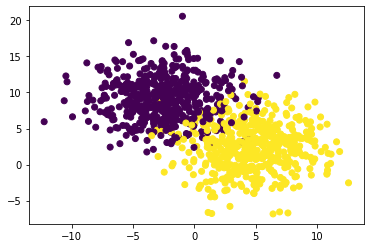

In [3]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
# Split our data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [6]:
# Fit (train) our model by using the training data
classifier.fit(X_train, y_train)

LogisticRegression()

In [7]:
# Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9533333333333334
Testing Data Score: 0.956


In [12]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[128,   5],
       [  6, 111]], dtype=int64)

In [13]:
confusion_matrix(y_true, y_pred).ravel()

array([128,   5,   6, 111], dtype=int64)

In [14]:
# The accuracy of the model on the test data is TP + TN / (TP + FP + TN + FN)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.956


In [15]:
# Generate a classification report for accuracy, precision, recall, and F1.
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       133
           1       0.96      0.95      0.95       117

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



# ==========================================

### 2.02 Student Do: Create a Confusion Matrix (0:15)

# Confusion Matrix Interpretation

In this activity, you'll create a logistic regression model to predict the onset of diabetes in five years for the 1988 Pima Diabetes dataset and interpret the confusion matrix that the model produces.

[Using the ADAP Learning Algorithm to Forecast the Onset of Diabetes Mellitus](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/) J.W. Smith, J.E. Everhart, W.C. Dickson, W.C. Knowler, and R.S. Johannes, Proc Annu Symp Comput Appl Med Care. 1988 Nov 9 : 261–265.

## Instructions

1. Load the Pima Diabetes dataset, and then split the data into training and testing sets.

2. Fit a logistic regression model to the training set.

3. Create a confusion matrix of the predicted vs. the actual outcomes for the testing set.

4. Manually calculate the precision, sensitivity, and F1 score of the model by using the values from the confusion matrix.

5. Create the classification report, and compare it to your manually calculated scores.

6. Answer the following questions: Is your model more precise or more sensitive? Which is more important for this model?

---

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
df = pd.read_csv(os.path.join("02-Stu_Confusion-Matrices", "Resources", "diabetes.csv"))
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [18]:
#  Are there any null values?
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
# What is the distribution of those with and without diabetes?
df.groupby("Outcome").size()
# df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [23]:
# Set the y variable to the "Outcome" column.
y = df["Outcome"]

In [24]:
# Drop the diabetes values and set the X to the remaining data.
X = df.drop("Outcome", axis=1)
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [25]:
# Split our data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
# Create a logistic regression model, fit (train) the model, and validate the model.
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.78125
Testing Data Score: 0.7239583333333334


In [27]:
# Create a confusion matrix and print out the confusion matrix for the predicted outcome.
y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[95, 28],
       [25, 44]], dtype=int64)

In [28]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

Predicted 0  Predicted 1
Actual 0           95           28
Actual 1           25           44

We can see from the confusion matrix that the Logistic Regression was better at predicting non-diabetics than it was at predicting diabetes. Out of 123 individuals without diabetes, 95 were predicted to not have diabetes (recall is 77%), whereas out of 69 individuals with diabetes, only 44 were predicted to have diabetes (recall is 64%).

#### Let's calculate the precision, sensitivity and F1 score.

In [29]:
# Create a flattened one-dimensional array of tn, fp, fn, tp with ravel()
tn, fp, fn, tp = cm.ravel()

In [30]:
tn, fp, fn, tp

(95, 28, 25, 44)

In [31]:
# Calculate the precision of the model based on the confusion matrix
precision = tp / (tp + fp)
precision

0.6111111111111112

In [32]:
# Calculate the sensitivity of the model based on the confusion matrix
sensitivity = tp / (tp + fn)
sensitivity

0.6376811594202898

In [33]:
f1 = 2*precision*sensitivity / (precision + sensitivity)
f1

0.624113475177305

In [34]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.61      0.64      0.62        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.73       192



Although the number of data points is small, using logistic regression we were able to achieve decent results in predicting that someone will have diabetes in 5 years, or conversely, it was better at predicting that someone will not have diabetes in 5 years. 

The accuracy to predict diabetes in 5 years is 72%. However, with a precision score of 0.61, recall and sensitivity of 0.64, and F1 score of 0.62 the logistic regression model is missing a lot individuals with diabetes. On the other hand, the logistic regression model was a bit better at predicting individuals without diabetes.

# ==========================================

### 2.03 Instructor Do: Decision Trees (0:10)

In [35]:
from sklearn import tree
from sklearn.datasets import load_iris

In [36]:
# Load the Iris dataset
iris = load_iris()

In [37]:
# Create and score a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
clf.score(iris.data, iris.target)

1.0

### To install graphviz and pydotplus
1. conda install python-graphviz (this puts graphviz in your virtual env's Library)
2. conda install -c conda-forge pydotplus

In [4]:
# !conda update -n base conda -y
# !conda install python-graphviz -y
# !conda install -c conda-forge pydotplus -y

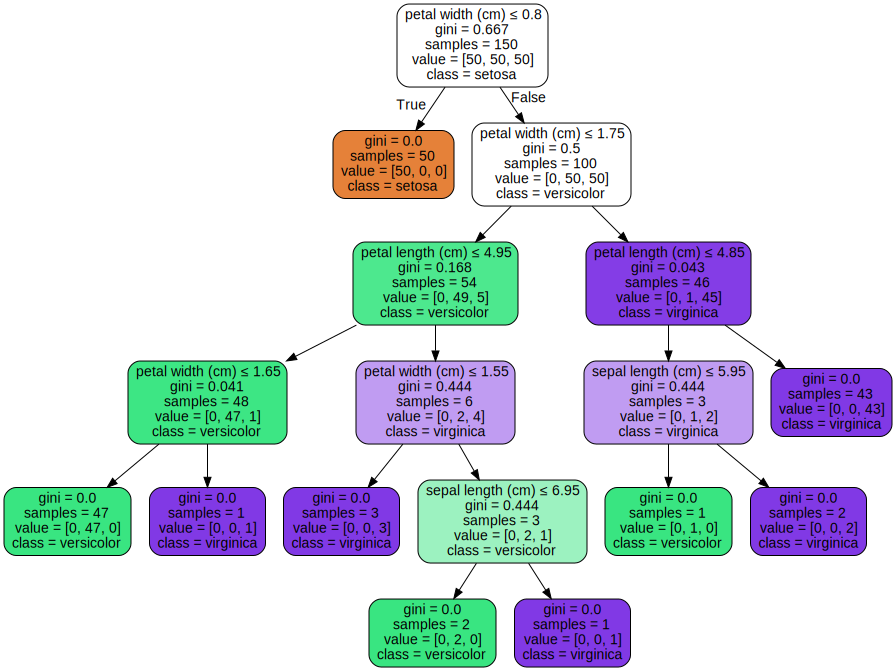

In [38]:
# Create a decision tree graph
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris.png')

graph = graphviz.Source(dot_data)  
graph 

# ==========================================

### 2.04 Instructor Do: Ensemble Methods (0:10)

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [42]:
# Create data
X, y = make_classification(random_state=42, n_features=10, n_informative=5, n_redundant=0, n_samples=1000)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[106,  23],
       [ 13, 108]], dtype=int64)

In [44]:
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm

array([[111,  18],
       [ 15, 106]], dtype=int64)

In [45]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

Predicted 0  Predicted 1
Actual 0          111           18
Actual 1           15          106

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       129
           1       0.84      0.89      0.86       121

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.87      0.86      0.86       250



In [47]:
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8613333333333333
Testing Score: 0.772


### Bagging
Instead of having one decision tree, we make 50 random trees and average their output. Decision trees try to make the best decision possible at every point. So if we use the same input, we'll get the same decision tree each time. (And, we won't get a different answer after aggregating.) To get different trees, we give them different inputs by randomly sampling the input dataset. Random sampling with replacement is known as bootstrapping. (We use replacement because a data point might occur multiple times in the random sample.) This method of creating a random ensemble is known as bootstrap aggregating, or bagging.

In [51]:
# for i in range(50):
#     print(i)

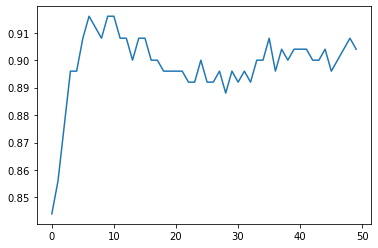

score: 0.904


In [48]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9986666666666667
Testing Score: 0.904


* We can go one step further by changing the behavior of the decision trees so that they randomly choose their splits. Counterintuitively, this can increase the accuracy of the model, even though we make each tree worse on its own.

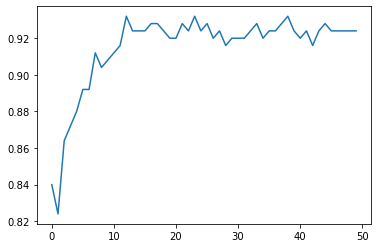

score: 0.924


In [14]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a random decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(splitter='random', random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

#### This algorithm is known as "Extremely Random Trees"
or ExtraTrees in scikit-learn

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.928


## Boosting

Boosting is another ensemble method that creates many weak learners (classifiers or regressors that do slightly better than chance). Boosting uses their predictions in aggregate to create one accurate prediction. However, unlike Bagging methods, each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [53]:
from boost_helper_functions import bootstrap, get_estimator_weight, new_sample_weights

n_estimators = 50

estimator_weights = np.zeros(n_estimators)
estimators = [DecisionTreeClassifier(max_depth=2) for i in range(n_estimators)]

sample_weights = np.ones(len(X_train_scaled)) / len(X_train_scaled)
for i in range(50):
    estimator = estimators[i]
    
    # Fit the estimator to a bootstrapped sample
    X_bootstrap, y_bootstrap = bootstrap(X_train_scaled, y_train, sample_weights, random_state=1)
    estimator.fit(X_bootstrap, y_bootstrap)
    
    # Calculate the amount that each sample contributes to the total error
    y_predict = estimator.predict(X_train_scaled)
    errors = np.abs(y_predict - y_train)
    normalized_errors = errors / np.abs(y_predict - y_train).max()
        
    # Calculate how much say this estimator should have in the final prediction
    estimator_weights[i] = get_estimator_weight(sample_weights, normalized_errors)
    
    # Calculate which samples the next estimator should focus on more
    sample_weights = new_sample_weights(sample_weights, normalized_errors)
    
y_preds = [reg.predict(X_test_scaled) for reg in estimators]
y_pred = pd.DataFrame(y_preds).median().round()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       129
           1       0.94      0.82      0.88       121

    accuracy                           0.89       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [55]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.896


# ==========================================

### 2.05 Everyone Do: Bag and Boost (0:15)

# Bag and Boost

In this activity, you'll apply three aggregate classifiers to predict diabetes for the Pima Diabetes dataset.

## Instructions

1. Import a Random Forests classifier and then fit the model to the data.

2. Import an Extremely Random Trees classifier and then fit the model to the data.

3. Import an Adaptive Boosting classifier and then fit the model to the data.

4. Calculate the classification report for each model. Also, calculate the score for both the training and the testing set. Compare the performance of the three models.

## Bonus

1. Refactor to reduce repetitive code. Create a function that takes in a model and a dataset and prints a classification report to compare different models.

2. Choose one of the models, and then read the scikit-learn documentation. Use your newly created function to try different parameters. Can you improve the model?

---

In [65]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [66]:
# Read the diabetes dataset
df = pd.read_csv('05-Evr_Bag-and-Boost/Resources/diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']
target_names = ["negative", "positive"]

In [68]:
# Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Import a Random Forests classifier
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    negative       0.83      0.89      0.86       123
    positive       0.78      0.67      0.72        69

    accuracy                           0.81       192
   macro avg       0.80      0.78      0.79       192
weighted avg       0.81      0.81      0.81       192

Training Score: 1.0
Testing Score: 0.8125


In [71]:
# Import an Extremely Random Trees classifier
from sklearn.ensemble import ExtraTreesClassifier

In [72]:
clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    negative       0.82      0.86      0.84       123
    positive       0.73      0.65      0.69        69

    accuracy                           0.79       192
   macro avg       0.77      0.76      0.76       192
weighted avg       0.78      0.79      0.78       192

Training Score: 1.0
Testing Score: 0.7864583333333334


In [73]:
# Import an Adaptive Boosting classifier
from sklearn.ensemble import AdaBoostClassifier

In [74]:
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    negative       0.82      0.86      0.84       123
    positive       0.73      0.65      0.69        69

    accuracy                           0.79       192
   macro avg       0.77      0.76      0.76       192
weighted avg       0.78      0.79      0.78       192

Training Score: 0.8229166666666666
Testing Score: 0.796875


In [76]:
# BONUS
def model_tester(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = model.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(classification_report(y_test, y_pred, target_names=target_names))
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    
model_tester(AdaBoostClassifier(random_state=1, n_estimators=100), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=500, learning_rate=0.1), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=1000, learning_rate=0.1), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=2000, learning_rate=0.1), X, y)

              precision    recall  f1-score   support

    negative       0.82      0.87      0.85       123
    positive       0.74      0.67      0.70        69

    accuracy                           0.80       192
   macro avg       0.78      0.77      0.77       192
weighted avg       0.79      0.80      0.79       192

Training Score: 0.8454861111111112
Testing Score: 0.796875
              precision    recall  f1-score   support

    negative       0.82      0.86      0.84       123
    positive       0.73      0.67      0.70        69

    accuracy                           0.79       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192

Training Score: 0.8819444444444444
Testing Score: 0.7916666666666666
              precision    recall  f1-score   support

    negative       0.81      0.89      0.84       123
    positive       0.75      0.62      0.68        69

    accuracy                           0.79       192


# ==========================================

### 2.06 Instructor Do: Feature Selection with Random Forest (0:05)

In [77]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
# Create data
X, y = make_classification(random_state=1, n_features=50, n_informative=5, n_redundant=0)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.76


[0.01957363 0.11588155 0.02671949 0.01235642 0.01770372 0.07453437
 0.01405267 0.01413583 0.01892128 0.01074294 0.01628946 0.01645848
 0.018682   0.01699861 0.0176364  0.01301255 0.01570845 0.01371403
 0.01050295 0.01107723 0.0105415  0.02810453 0.01104434 0.01291979
 0.01172246 0.01594598 0.01161194 0.01284583 0.04016023 0.02011063
 0.01166108 0.01283269 0.02629694 0.01630979 0.01528582 0.00800544
 0.01696003 0.01449151 0.0469682  0.01637734 0.01806633 0.01411943
 0.01714387 0.01517432 0.04015419 0.01210507 0.008706   0.01281879
 0.01460335 0.01221054]


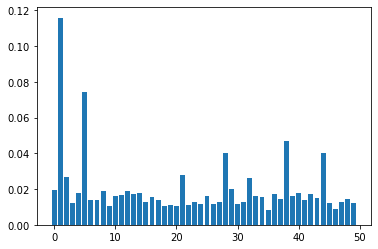

In [80]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [81]:
from sklearn.feature_selection import SelectFromModel

In [83]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False])

In [84]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [85]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.68


* The logistic regression model fit to the full dataset is overfitting the training data. That is, the noisy parameters confuse it. 

In [86]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9066666666666666
Testing Score: 0.84


* However, fitting to the smaller dataset with the selected features has less noisy parameters to confuse the model. So, we get a more accurate model.

# ==========================================

### 2.07 Students Do: Finding the Features from the Trees (0:15)

# Finding the Features from the Trees

In this activity, you'll use a Random Forests model to find the most important features for predicting arrhythmia in heartbeats.

## Instructions

1. Import the arrhythmia data, and then fit a Random Forests model to the scaled and split data.

2. Import SelectModel to extract the best features from the Random Forests model.

3. Fit a logistic regression to the original dataset, and then print its score.

4. Fit a logistic regression to the selected dataset, and then print its score.

5. Compare the scores of the two logistic regression models.

---

In [87]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [89]:
# X, y = make_classification(random_state=1, n_features=50, n_informative=5, n_redundant=0)
# X = pd.DataFrame(X)
df = pd.read_csv('07-Stu_Forest-Feature-Selection/Resources/arrhythmia.csv')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.drop('J_angle', axis=1, inplace=True)
df.dropna(inplace=True)
        
X = df.drop('class', axis=1)
y = df['class'] != 1

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7142857142857143


In [92]:
feature_importances = clf.feature_importances_

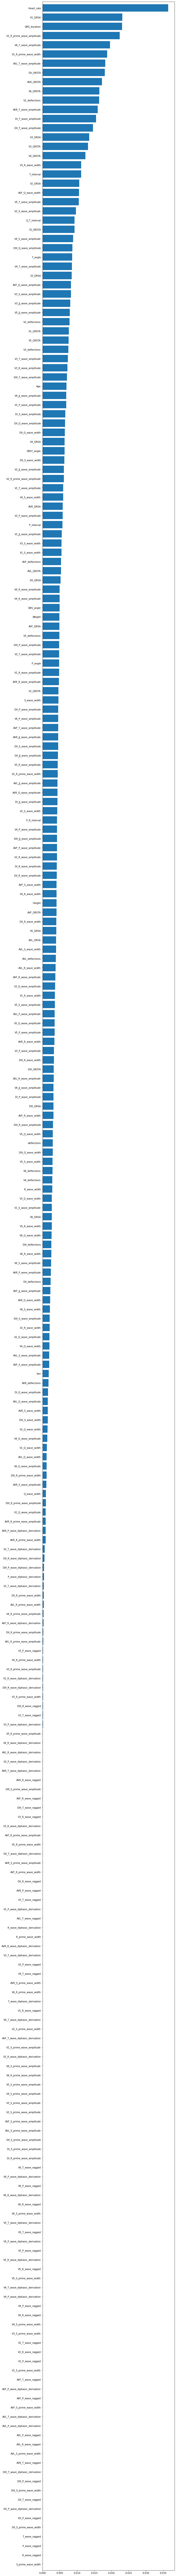

In [93]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [94]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [95]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\k\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [96]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9523809523809523
Testing Score: 0.7142857142857143


In [97]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8984126984126984
Testing Score: 0.7523809523809524


# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "17.2-Supervise-ML - Confusion Matrices, Decision Trees, and Ensemble Learning"
objectives = [
    "Quantify and evaluate classification models by using confusion matrices",
    "Interpret confusion matrices and accuracy measures",
    "Use decision trees and random forests to aid the feature-selection process",
    "Apply bagging and boosting methods to create and use ensemble algorithms",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))